# Regression Project

In [338]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

import re

In [339]:
X_train = pd.read_csv('X.csv')
X_train.sample(5)

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
381,3515,3515,31.0,M,high|scho,junior|hr|coordinato,3.0,u,Asian,2.406008,43.881346,3515,60.0
1274,4266,4266,29.0,F,bachelor's|degr,marketing|coordinato,3.0,u,Welsh,1.620119,80.639748,4266,56.0
4571,2821,2821,34.0,F,master's|degr,full|stack|enginee,10.0,canad,White,1.918389,74.628503,2821,264.0
4076,5202,5202,27.0,M,bachelor's|degr,junior|software|enginee,2.0,chin,Chinese,1.838430,38.626047,5202,25.0
1009,1068,1068,29.0,M,bachelor,software|enginee,6.0,australi,Asian,2.065228,51.488365,1068,108.0


In [340]:
y_train = pd.read_csv('y.csv')
y_train.head(5)

,id,Salary
0,2477,175966.0
1,76,160000.0
2,64,35000.0
3,924,195000.0
4,242,120000.0


In [341]:
X_test_csv = pd.read_csv('X_test.csv')
X_test_csv.head(5)

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,6480,6480,47.0,M,master's|degr,director|of|marketin,16.0,us,Hispanic,1.818297,88.182651,6480,675.0
1,5343,5343,29.0,F,bachelor's|degr,social|media|manage,4.0,us,African American,1.562833,59.760856,5343,81.0
2,2576,2576,29.0,M,high|scho,back|end|develope,5.0,us,African American,2.059395,46.765234,2576,108.0
3,6103,6103,40.0,M,master's|degr,marketing|directo,15.0,us,Asian,2.482954,89.530121,6103,532.0
4,3290,3290,29.0,M,bachelor's|degr,software|enginee,6.0,us,African American,1.639781,42.973461,3290,112.0


In [342]:
X_test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1341 non-null   int64  
 1   Unnamed: 0           1341 non-null   int64  
 2   Age                  1341 non-null   float64
 3   Gender               1341 non-null   object 
 4   Education Level      1341 non-null   object 
 5   Job Title            1341 non-null   object 
 6   Years of Experience  1341 non-null   float64
 7   Country              1341 non-null   object 
 8   Race                 1341 non-null   object 
 9   height               1341 non-null   float64
 10  weight               1341 non-null   float64
 11  id                   1341 non-null   int64  
 12  professionalism      1341 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 136.3+ KB


In [343]:
X_train.drop('Unnamed: 0.1', axis=1, inplace=True)
X_train.drop('Unnamed: 0', axis =1, inplace=True)
X_test_csv.drop('Unnamed: 0.1', axis=1, inplace=True)
X_test_csv.drop('Unnamed: 0', axis =1, inplace=True)

# EDA

In [344]:
merged_df = pd.merge(X_train, y_train, on='id')

In [345]:
# clear all null lines from dataframe

for column in merged_df.columns:
    without_nulls = merged_df[column].notnull() 
    merged_df = merged_df[without_nulls]

In [346]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 0 to 5362
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5355 non-null   float64
 1   Gender               5355 non-null   object 
 2   Education Level      5355 non-null   object 
 3   Job Title            5355 non-null   object 
 4   Years of Experience  5355 non-null   float64
 5   Country              5355 non-null   object 
 6   Race                 5355 non-null   object 
 7   height               5355 non-null   float64
 8   weight               5355 non-null   float64
 9   id                   5355 non-null   int64  
 10  professionalism      5355 non-null   float64
 11  Salary               5355 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 543.9+ KB


In [347]:
merged_df.describe().style.format("{:.2f}")

,Age,Years of Experience,height,weight,id,professionalism,Salary
count,5355.00,5355.00,5355.00,5355.00,5355.00,5355.00,5355.00
mean,35.15,9.62,2.00,66.90,3364.59,316.50,115641.29
std,7.62,6.08,0.29,18.17,1932.87,305.10,52763.59
min,22.00,1.00,1.50,13.64,4.00,0.00,500.00
25%,29.00,5.00,1.75,53.89,1694.50,84.00,70000.00
50%,33.00,8.00,2.00,64.75,3366.00,217.00,115000.00
75%,39.00,13.00,2.26,78.37,5044.50,451.00,160000.00
max,64.00,36.00,2.50,140.00,6703.00,2040.00,250000.00


In [348]:
merged_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary
0,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0,175966.0
1,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,76,1100.0,160000.0
2,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0,35000.0
3,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,924,279.0,195000.0
4,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,242,380.0,120000.0


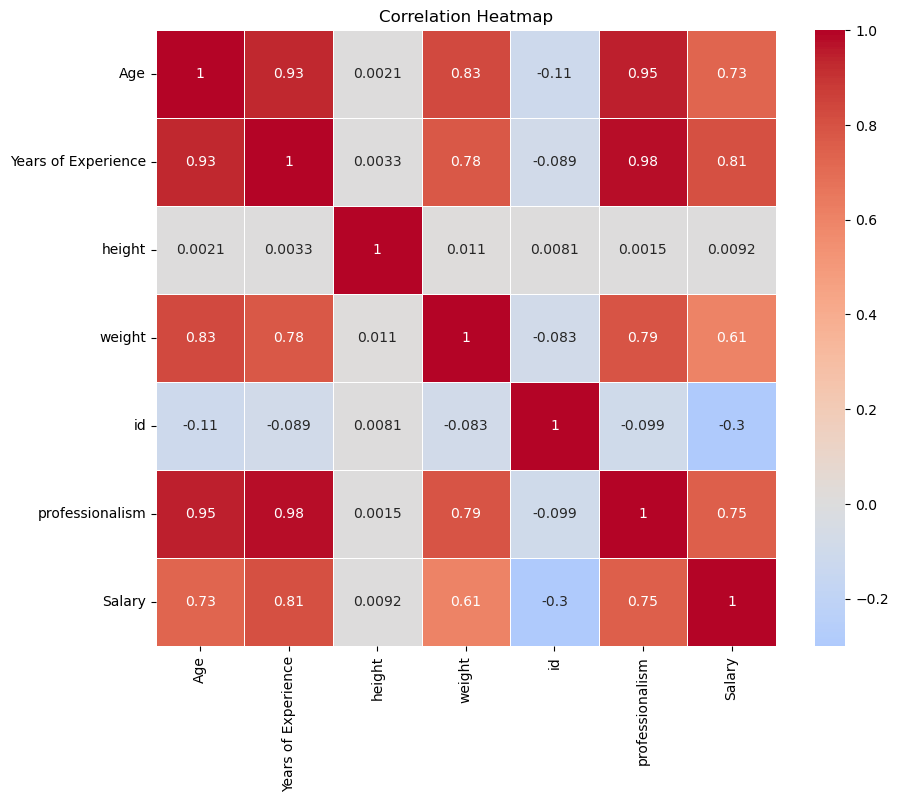

In [349]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

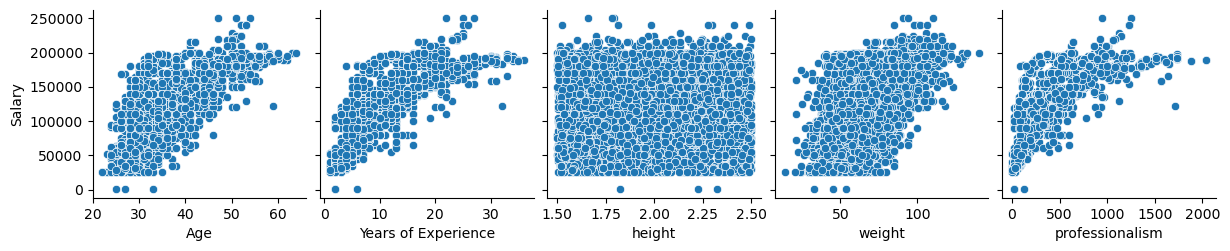

In [350]:
sns.pairplot(merged_df, x_vars=['Age', 'Years of Experience', 'height', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

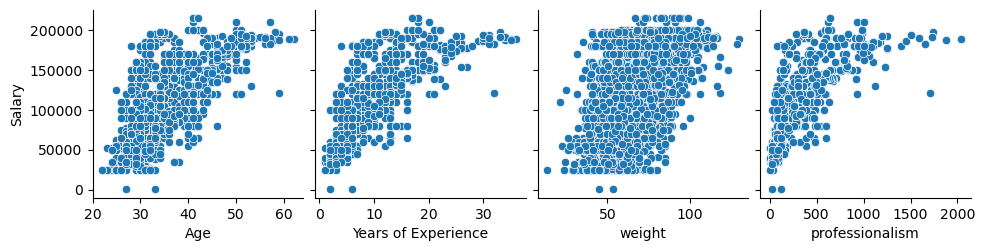

In [351]:
df_female = merged_df.loc[merged_df['Gender'] == 'F']

sns.pairplot(df_female, x_vars=['Age', 'Years of Experience', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

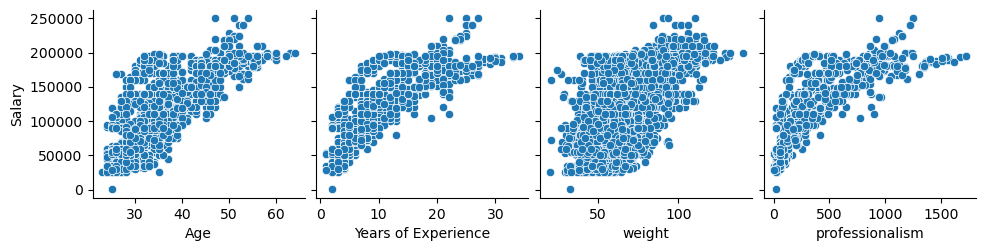

In [352]:
df_male = merged_df.loc[merged_df['Gender'] == 'M']

sns.pairplot(df_male, x_vars=['Age', 'Years of Experience', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

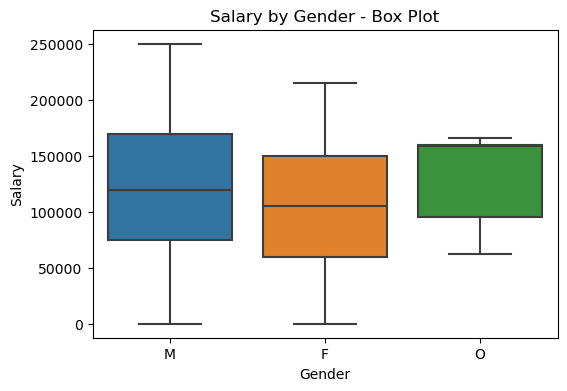

In [353]:
#merged_df = merged_df[merged_df['Gender'].isin(['F', 'M'])]

plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Salary', data=merged_df)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary by Gender - Box Plot')
plt.show()

In [354]:
# Independent t-test to understand if The differences significant
import scipy.stats as stats

female_salaries = merged_df[merged_df['Gender'] == 'F']['Salary']
male_salaries = merged_df[merged_df['Gender'] == 'M']['Salary']

female_salaries = female_salaries.dropna()
male_salaries = male_salaries.dropna()

t_statistic, p_value = stats.ttest_ind(female_salaries, male_salaries, alternative='two-sided') #'two-sided' = means are not equal

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The differences in salary between Female and Male are statistically significant")
else:
    print("The differences in salary between Female and Male are not statistically significant")

t-statistic: -8.674235864898977
p-value: 5.4510666315778525e-18
The differences in salary between Female and Male are statistically significant


In [355]:
# creating a new column for experience level

experience_level = ['junior', 'juniour', 'senior', 'director', 'directo', 'chief', 'vp', 'training']

def experience_cat(title):
    if isinstance(title, str):  # Check if title is a string
        title_words = title.lower().split('|')

        for word in title_words:
            if word in experience_level:
                return word
    return 'null'

merged_df['new_col_experience_level'] = merged_df['Job Title'].apply(experience_cat)

merged_df['new_col_experience_level'] = merged_df['new_col_experience_level'].replace("juniour", "junior").replace("directo", "director")
print(merged_df['new_col_experience_level'].unique())

['null' 'junior' 'senior' 'director' 'training' 'chief' 'vp']


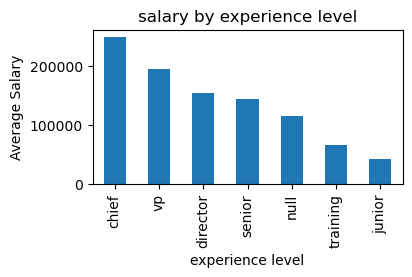

In [356]:
average_salary_by_role_Level = merged_df.groupby('new_col_experience_level')['Salary'].mean()
salary_by_role_Level_desc = average_salary_by_role_Level.sort_values(ascending=False).round(2)

salary_by_role_Level_desc.plot(kind = 'bar', figsize=(4,2))

plt.title('salary by experience level')
plt.xlabel('experience level')
plt.ylabel('Average Salary')
plt.show()

In [357]:
# creating a new column for job_title

def clean_job_title(title):
    if isinstance(title, str):
        title_words = title.lower().split('|')

        cleaned_words = [word for word in title_words if word not in experience_level]
        cleaned_title = '|'.join(cleaned_words)
        cleaned_title = cleaned_title.replace('|', '_')  # Replace '|' with '_'
        
        return cleaned_title
    return title

merged_df['Job Title'] = merged_df['Job Title'].apply(clean_job_title)

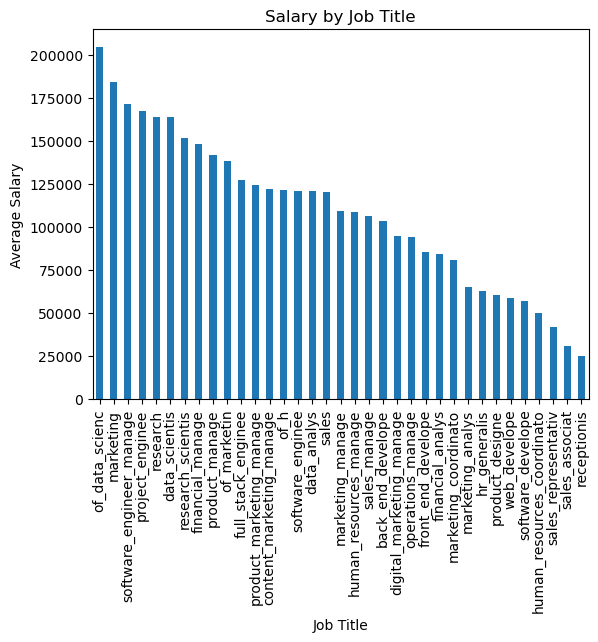

In [358]:
value_counts_over_30 = merged_df['Job Title'].value_counts()[merged_df['Job Title'].value_counts() >= 30]

filtered_df = merged_df[merged_df['Job Title'].isin(value_counts_over_30.index)]

average_salary_for_job = filtered_df.groupby('Job Title')['Salary'].mean().round(2)

average_salary_for_job_desc = average_salary_for_job.sort_values(ascending=False)


average_salary_for_job_desc.plot(kind = 'bar')

plt.title('Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

In [359]:
# Define jobs for each categories

sales_marketing = ['market', 'sales', 'media', 'content']
tech = ['eng', 'dev', 'analys', 'scien', 'research', 'product', 'data', 'project', 'research', 'it', 'intelligence']
hr = ['human', 'hr', 'h', 'recruite']
office = ['reception', 'operations', 'office', 'administrative', 'customer', 'service', 'support', 'supply', 'coord']
designe = ['designe', 'ux']
business = ['account', 'fin', 'relations', 'business', 'strategy']

# Function to categorize job titles based on root words
def job_categorise(title):
    title_lower = title.lower()
    for word in title_lower.split():
        for names_list, category in [
            (sales_marketing, 'Sales/Marketing'),
            (tech, 'Tech'),
            (hr, 'HR'),
            (office, 'Office'),
            (designe, 'Design'),
            (business, 'Business')
        ]:
            if any(name in word for name in names_list):
                return category
    return 'Others'

for title in merged_df['Job Title']:
    print(f"{title}: {job_categorise(title)}")

back_end_develope: Tech
operations_manage: Office
accountan: Business
data_analys: Tech
product_manage: Tech
marketing_manage: Sales/Marketing
marketing_manage: Sales/Marketing
of_marketin: Sales/Marketing
product_manage: Tech
data_scientis: Tech
software_engineer_manage: Tech
marketing_manage: Sales/Marketing
full_stack_enginee: Tech
human_resources_manage: HR
software_engineer_manage: Tech
data_scientis: Tech
web_develope: Tech
research_scientis: Tech
marketing_manage: Sales/Marketing
research_scientis: Tech
marketing_analys: Sales/Marketing
software_engineer_manage: Tech
data_scientis: Tech
of_h: HR
marketing_coordinato: Sales/Marketing
product_manage: Tech
digital_marketing_manage: Sales/Marketing
full_stack_enginee: Tech
research_scientis: Tech
marketing_analys: Sales/Marketing
back_end_develope: Tech
product_manage: Tech
product_manage: Tech
software_enginee: Tech
marketing_manage: Sales/Marketing
front_end_develope: Tech
software_enginee: Tech
software_enginee: Tech
full_stack_e

In [360]:
merged_df.loc[:, 'new_col_job_cat'] = merged_df['Job Title'].apply(job_categorise)
merged_df

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary,new_col_experience_level,new_col_job_cat
0,52.0,M,bachelor's|degr,back_end_develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0,175966.0,null,Tech
1,52.0,F,bachelor,operations_manage,23.0,us,White,2.451414,87.456039,76,1100.0,160000.0,null,Office
2,27.0,M,bachelor,accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0,35000.0,junior,Business
3,32.0,M,bachelor,data_analys,11.0,u,Welsh,2.160562,61.403169,924,279.0,195000.0,null,Tech
4,39.0,F,bachelor,product_manage,11.0,chin,Korean,1.794105,72.049210,242,380.0,120000.0,senior,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,32.0,F,bachelor,business_development_associat,4.0,canad,Black,2.329507,64.070050,354,93.0,50000.0,junior,Tech
5359,44.0,M,p,data_scientis,15.0,chin,White,1.945457,93.478548,3677,546.0,140000.0,null,Tech
5360,25.0,M,high|scho,delivery_drive,1.0,canad,Asian,1.575751,38.216264,6032,0.0,28000.0,null,Others
5361,32.0,F,bachelor's|degr,software_enginee,6.0,chin,White,1.797528,56.571118,3278,150.0,90000.0,null,Tech


In [361]:
merged_df['new_col_job_cat'].unique()

array(['Tech', 'Office', 'Business', 'Sales/Marketing', 'HR', 'Others',
       'Design'], dtype=object)

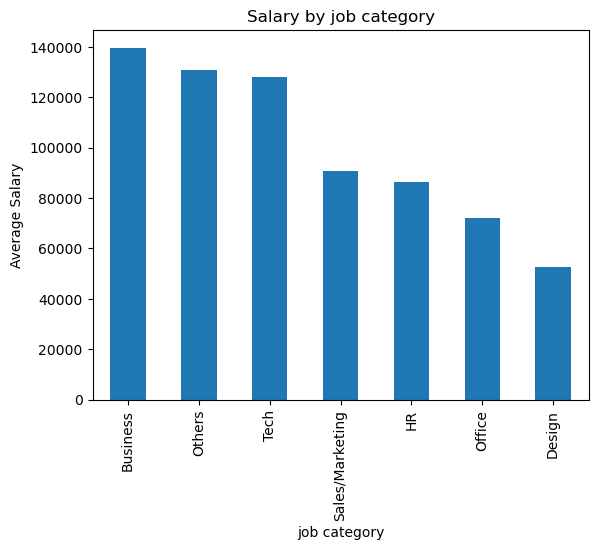

In [362]:
average_salary_for_job_cat = merged_df.groupby('new_col_job_cat')['Salary'].mean().round(2)

average_salary_for_job_cat_desc = average_salary_for_job_cat.sort_values(ascending=False)

average_salary_for_job_cat_desc.plot(kind = 'bar')

plt.title('Salary by job category')
plt.xlabel('job category')
plt.ylabel('Average Salary')
plt.show()

In [363]:
#There does not appear to be an effect of country on salary
average_salary_by_country = merged_df.groupby('Country')['Salary'].mean()
average_salary_by_country

Country
australi    115323.844569
canad       117338.452004
chin        115945.122974
u           116385.074006
us          113238.337638
Name: Salary, dtype: float64

In [364]:
#There does not appear to be an effect of race on salary
average_salary_by_race = merged_df.groupby('Race')['Salary'].mean()
average_salary_by_race.sort_values(ascending=False)

Race
Black               120530.982857
Korean              117238.190883
White               117222.775819
Asian               116244.476006
Mixed               116242.225455
Australian          114197.822222
Welsh               113120.034091
Chinese             111477.532951
African American    110005.007273
Hispanic            109507.764940
Name: Salary, dtype: float64

In [365]:
merged_df['Education Level'].unique()

array(["bachelor's|degr", 'bachelor', "master's|degr", 'p', 'master',
       'high|scho'], dtype=object)

In [366]:
merged_df['Education Level'] = merged_df['Education Level'].replace("master's|degr", "master").replace("bachelor's|degr", "bachelor")
merged_df = merged_df.dropna(subset=['Education Level'])
merged_df['Education Level'].unique()

array(['bachelor', 'master', 'p', 'high|scho'], dtype=object)

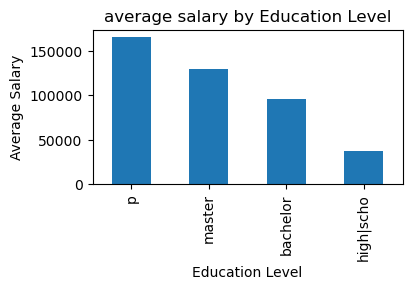

In [367]:
average_salary_by_Education_Level = merged_df.groupby('Education Level')['Salary'].mean()
average_salary_Education_Level_desc = average_salary_by_Education_Level.sort_values(ascending=False)

average_salary_Education_Level_desc.plot(kind = 'bar', figsize=(4,2))

plt.title('average salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()

In [368]:
merged_df_copy = merged_df.copy() 
merged_df_copy['Gender'] = merged_df_copy['Gender'].replace({'F': 0,'M': 1})
merged_df_copy['Education Level'] = \
    merged_df_copy['Education Level'].replace({'high|scho':0,'bachelor':1,'master':2,'p':3})
merged_df_copy['new_col_experience_level'] = \
    merged_df_copy['new_col_experience_level'].replace({'null':0,'training':1,'junior':2,'senior':3,'director':4,'chief':5,'vp':6})
merged_df_copy['new_col_job_cat'] = \
    merged_df_copy['new_col_job_cat'].replace({'Others':0,'HR': 1,'Design':2,'Office':3,'Sales/Marketing':4,'Tech':5, 'Business':6})

In [369]:
# Perform one-hot encoding on 'Gender' and 'new_col_job_cat'

merged_df_copy = pd.get_dummies(merged_df_copy, columns=['Gender', 'new_col_job_cat']) 

In [370]:
columns_to_drop = ['Country', 'Race', 'height', 'Job Title', 'id'] #'weight','Age','Years of Experience','professionalism']

merged_df_copy.drop(columns = columns_to_drop, axis=1, inplace=True)

In [371]:
# Fill NaN values in columns

def fillna_columns(dataframe, columns, value=0):
    for column in columns:
        dataframe[column] = dataframe[column].fillna(value)

columns_to_fill = ['Salary', 'Age', 'Years of Experience', 'professionalism', 'weight']

fillna_columns(merged_df_copy, columns_to_fill)
merged_df_copy

,Age,Education Level,Years of Experience,weight,professionalism,Salary,new_col_experience_level,Gender_0,Gender_1,Gender_O,new_col_job_cat_0,new_col_job_cat_1,new_col_job_cat_2,new_col_job_cat_3,new_col_job_cat_4,new_col_job_cat_5,new_col_job_cat_6
0,52.0,1,24.0,95.021957,1150.0,175966.0,0,0,1,0,0,0,0,0,0,1,0
1,52.0,1,23.0,87.456039,1100.0,160000.0,0,1,0,0,0,0,0,1,0,0,0
2,27.0,1,2.0,56.997108,26.0,35000.0,2,0,1,0,0,0,0,0,0,0,1
3,32.0,1,11.0,61.403169,279.0,195000.0,0,0,1,0,0,0,0,0,0,1,0
4,39.0,1,11.0,72.049210,380.0,120000.0,3,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,32.0,1,4.0,64.070050,93.0,50000.0,2,1,0,0,0,0,0,0,0,1,0
5359,44.0,3,15.0,93.478548,546.0,140000.0,0,0,1,0,0,0,0,0,0,1,0
5360,25.0,0,1.0,38.216264,0.0,28000.0,0,0,1,0,1,0,0,0,0,0,0
5361,32.0,1,6.0,56.571118,150.0,90000.0,0,1,0,0,0,0,0,0,0,1,0


# Regression Tree Model

In [372]:
X = merged_df_copy.drop('Salary', axis=1)
#X = merged_df_copy[['Age','Gender','Education Level','Years of Experience','professionalism','new_col_experience_level','new_col_job_cat']]
y = merged_df_copy['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

model_DTR = DecisionTreeRegressor(max_depth=50, min_samples_split=25, min_samples_leaf=1)


model_DTR.fit(X_train, y_train)

# predictions on the train data
y_pred_train = model_DTR.predict(X_train)

# predictions on the test data
y_pred_test = model_DTR.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 11874.470406908866
Test RMSE: 14807.086187367011


In [373]:
# # Visualize the Decision Tree
# plt.figure(figsize=(20, 10))
# plot_tree(model, feature_names=X_test.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.title('Decision Tree Regression')
# plt.show()

In [374]:
for feature, importance in zip(X.columns, model_DTR.feature_importances_):
    print(f'{feature:12}: {importance}')

Age         : 0.026182654936584573
Education Level: 0.024581106155437293
Years of Experience: 0.1318825825970104
weight      : 0.005556340589042703
professionalism: 0.6971077226715613
new_col_experience_level: 0.017480803207566797
Gender_0    : 0.00882673680052585
Gender_1    : 0.0017377209936342232
Gender_O    : 0.0
new_col_job_cat_0: 0.0002837707257523157
new_col_job_cat_1: 0.0001859023208974532
new_col_job_cat_2: 0.0
new_col_job_cat_3: 0.0006659038547873076
new_col_job_cat_4: 0.005183873139168876
new_col_job_cat_5: 0.07722645353729829
new_col_job_cat_6: 0.0030984284707326623


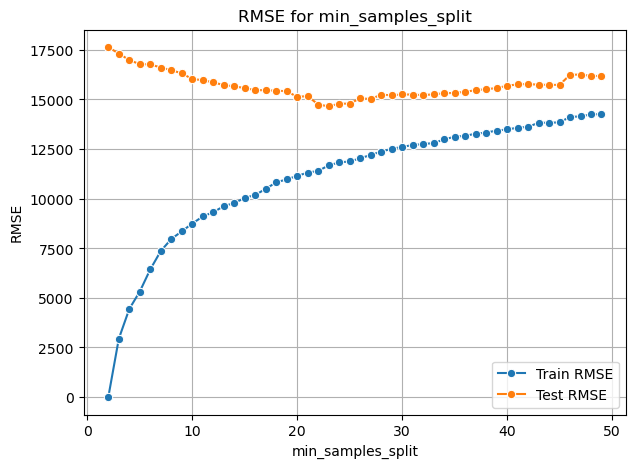

In [375]:
min_samples_split_values = []
rmse_train_values = []
rmse_test_values = []

for i in range(2, 50):   # Vary min_samples_split from 2 to 49
        model = DecisionTreeRegressor(min_samples_split=i)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        rmse_train_i = mean_squared_error(y_train, y_pred_train, squared=False)
        rmse_test_i = mean_squared_error(y_test, y_pred_test, squared=False)
        min_samples_split_values.append(i)
        rmse_train_values.append(rmse_train_i)
        rmse_test_values.append(rmse_test_i)

# Create a new figure for the combined plot
plt.figure(figsize=(7, 5))

# Plot for varying min_samples_split
sns.lineplot(x=min_samples_split_values, y=rmse_train_values, marker='o', label='Train RMSE')
sns.lineplot(x=min_samples_split_values, y=rmse_test_values, marker='o', label='Test RMSE')

plt.title('RMSE for min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

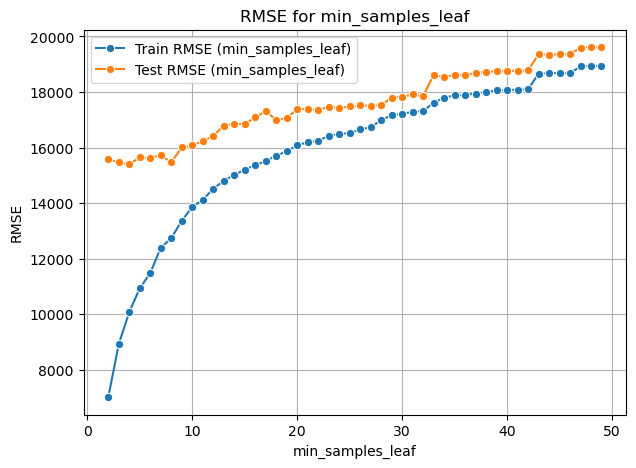

In [376]:
min_samples_leaf_values = []
rmse_train_l = []
rmse_test_l = []

for i in range(2, 50):   # Vary max_leaf_nodes from 2 to 50
        model = DecisionTreeRegressor(min_samples_leaf=i)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        rmse_train_i = mean_squared_error(y_train, y_pred_train, squared=False)
        rmse_test_i = mean_squared_error(y_test, y_pred_test, squared=False)
        min_samples_leaf_values.append(i)
        rmse_train_l.append(rmse_train_i)
        rmse_test_l.append(rmse_test_i)

# Create a new figure for the combined plot
plt.figure(figsize=(7, 5))

# Plot for varying min_samples_leaf
sns.lineplot(x=min_samples_leaf_values, y=rmse_train_l, marker='o', label='Train RMSE (min_samples_leaf)')
sns.lineplot(x=min_samples_leaf_values, y=rmse_test_l, marker='o', label='Test RMSE (min_samples_leaf)')

plt.title('RMSE for min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

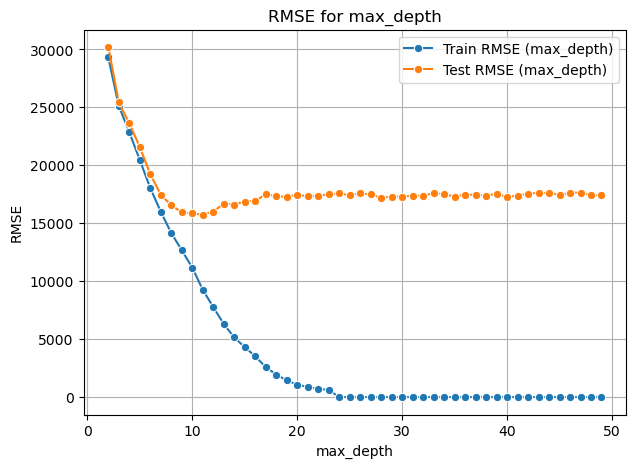

In [377]:
# Checking max_depth for improve RMSE

max_depth = []
rmse_train_l = []
rmse_test_l = []

for i in range(2, 50):   # Vary max_depth from 2 to 50
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    
    max_depth.append(i)
    rmse_train_l.append(rmse_train)
    rmse_test_l.append(rmse_test)

plt.figure(figsize=(7,5))

# # Plot for varying max_depth
sns.lineplot(x=max_depth, y=rmse_train_l, marker='o', label='Train RMSE (max_depth)')
sns.lineplot(x=max_depth, y=rmse_test_l, marker='o', label='Test RMSE (max_depth)')

plt.title('RMSE for max_depth')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

In [378]:
import math

# Define the parameter values to search
criteria = ['squared_error']
max_depths = [5,50,80]
min_samples_splits = [2,25,50]
min_samples_leafs = [1,10,20]


best_score = float('inf')
best_params = {}

# Loop through all combinations of parameters
for criterion in criteria:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leafs:

                # Create a Regression tree model with current parameter values
                reg_tree = DecisionTreeRegressor(criterion=criterion,
                                                 max_depth=max_depth,
                                                 min_samples_split=min_samples_split,
                                                 min_samples_leaf=min_samples_leaf)

                # Fit the model to the training data
                reg_tree.fit(X_train, y_train)

                # Generate predictions on the validation data
                y_pred = reg_tree.predict(X_test)

                # Calculate the mean squared error
                mse = mean_squared_error(y_test, y_pred)

                # Check if current model has better performance
                if mse < best_score:
                    best_score = mse
                    best_params = {'criterion': criterion,
                                   'max_depth': max_depth,
                                   'min_samples_split': min_samples_split,
                                   'min_samples_leaf': min_samples_leaf,
                                    'rmse': math.sqrt(mse)}

# Print the best parameters found
print("Best parameters:", best_params)

Best parameters: {'criterion': 'squared_error', 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 1, 'rmse': 14771.170056736644}


# K Nearest Neighbors

In [379]:
#X = merged_df_copy[['Age','Gender','Education Level','Years of Experience','professionalism','new_col_experience_level','new_col_job_cat']]
X = merged_df_copy[['Age', 'Education Level', 'Years of Experience', 'professionalism', 'new_col_experience_level', 'new_col_job_cat_5']]
y = merged_df_copy['Salary']

model_KNN = KNeighborsRegressor(weights='distance', n_neighbors= 5, p= 1) # n_neighbors=12
model_KNN.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)

y_pred_test = model.predict(X_test_scaled)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 9375.026568871855
Test RMSE: 15801.483623768094


In [380]:
sum(cross_val_score(model_KNN, X, y, cv= 10))/10 

0.9145726742152815

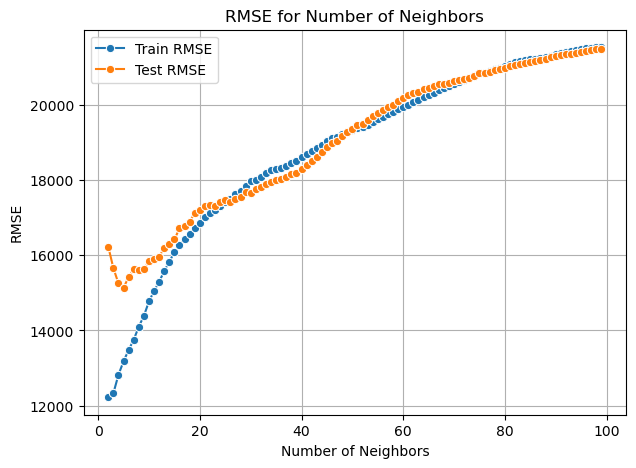

In [381]:
n_neighbors= []
rmse_train_KNN = []
rmse_test_KNN = []

for i in range(2,100):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    
    n_neighbors.append(i) 
    rmse_train_KNN.append(rmse_train)
    rmse_test_KNN.append(rmse_test)

plt.figure(figsize=(7,5))
sns.lineplot(x=n_neighbors, y=rmse_train_KNN, marker='o', label='Train RMSE')
sns.lineplot(x=n_neighbors, y=rmse_test_KNN, marker='o', label='Test RMSE')
plt.title('RMSE for Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

In [382]:
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter values to search
criteria_values = ['squared_error']
weights_values = ['distance', 'uniform']
n_neighbors_values = [2, 5, 12, 15]
p_values = [1, 2]

best_score = float('inf')
best_params = {}

# Loop through all combinations of parameters
for criteria in criteria_values:
    for n_neighbors in n_neighbors_values:
        for weights in weights_values:
            for p_value in p_values:

                # Create a KNN regression model with current parameter values
                KNN_model = KNeighborsRegressor(
                    n_neighbors=n_neighbors,
                    weights=weights,
                    p=p_value
                )

                # Fit the model to the training data
                KNN_model.fit(X_train, y_train)

                # Generate predictions on the validation data
                y_pred = KNN_model.predict(X_test)

                # Calculate the negative mean squared error
                mse = mean_squared_error(y_test, y_pred)

                # Check if current model has better performance
                if mse < best_score:
                    best_score = mse
                    best_params = {
                        'weights': weights,
                        'n_neighbors': n_neighbors,
                        'p': p_value,
                        'rmse': math.sqrt(mse)
                    }

# Print the best parameters found
print("Best parameters:", best_params)


Best parameters: {'weights': 'distance', 'n_neighbors': 5, 'p': 1, 'rmse': 15752.724376855112}


# Final Pretiction {id, y_test_pred)

In [383]:
X_test_csv

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,47.0,M,master's|degr,director|of|marketin,16.0,us,Hispanic,1.818297,88.182651,6480,675.0
1,29.0,F,bachelor's|degr,social|media|manage,4.0,us,African American,1.562833,59.760856,5343,81.0
2,29.0,M,high|scho,back|end|develope,5.0,us,African American,2.059395,46.765234,2576,108.0
3,40.0,M,master's|degr,marketing|directo,15.0,us,Asian,2.482954,89.530121,6103,532.0
4,29.0,M,bachelor's|degr,software|enginee,6.0,us,African American,1.639781,42.973461,3290,112.0
...,...,...,...,...,...,...,...,...,...,...,...
1336,44.0,M,master's|degr,product|manage,15.0,us,Hispanic,2.461952,87.903075,3263,588.0
1337,43.0,M,p,data|scientis,16.0,canad,White,2.208312,84.031023,4434,615.0
1338,41.0,F,master's|degr,marketing|coordinato,12.0,chin,Korean,1.755111,82.251038,4049,429.0
1339,37.0,M,bachelor's|degr,software|engineer|manage,10.0,australi,White,2.328205,71.174519,2102,288.0


In [384]:
# Fitting X_test to the trained data

#X_test_csv = X_test_csv[X_test_csv['Gender'].isin(['F', 'M'])]

experience_level = ['junior', 'juniour', 'senior', 'director', 'directo', 'chief', 'vp', 'training']

def experience_cat(title):
    if isinstance(title, str):  # Check if title is a string
        title_words = title.lower().split('|')

        for word in title_words:
            if word in experience_level:
                return word
    return 'null'

X_test_csv['new_col_experience_level'] = X_test_csv['Job Title'].apply(experience_cat)

X_test_csv['new_col_experience_level'] = X_test_csv['new_col_experience_level'].replace("juniour", "junior").replace("directo", "director")


def clean_job_title(title):
    if isinstance(title, str):
        title_words = title.lower().split('|')

        cleaned_words = [word for word in title_words if word not in experience_level]
        cleaned_title = '|'.join(cleaned_words)
        cleaned_title = cleaned_title.replace('|', '_')  # Replace '|' with '_'
        
        return cleaned_title
    return title

X_test_csv['Job Title'] = X_test_csv['Job Title'].apply(clean_job_title)


# Define jobs for each categories

sales_marketing = ['market', 'sales', 'media', 'content']
tech = ['eng', 'dev', 'analys', 'scien', 'research', 'product', 'data', 'project', 'research', 'it', 'intelligence']
hr = ['human', 'hr', 'h', 'recruite']
office = ['reception', 'operations', 'office', 'administrative', 'customer', 'service', 'support', 'supply', 'coord']
designe = ['designe', 'ux']
business = ['account', 'fin', 'relations', 'business', 'strategy']

# Function to categorize job titles based on root words
def job_categorise(title):
    title_lower = title.lower()
    for word in title_lower.split():
        for names_list, category in [
            (sales_marketing, 'Sales/Marketing'),
            (tech, 'Tech'),
            (hr, 'HR'),
            (office, 'Office'),
            (designe, 'Design'),
            (business, 'Business')
        ]:
            if any(name in word for name in names_list):
                return category
    return 'Others'


X_test_csv.loc[:, 'new_col_job_cat'] = X_test_csv['Job Title'].apply(job_categorise)

X_test_csv['Education Level'] = X_test_csv['Education Level'].replace("master's|degr", "master").replace("bachelor's|degr", "bachelor")
#merged_df = merged_df.dropna(subset=['Education Level'])
X_test_csv

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,new_col_experience_level,new_col_job_cat
0,47.0,M,master,of_marketin,16.0,us,Hispanic,1.818297,88.182651,6480,675.0,director,Sales/Marketing
1,29.0,F,bachelor,social_media_manage,4.0,us,African American,1.562833,59.760856,5343,81.0,null,Sales/Marketing
2,29.0,M,high|scho,back_end_develope,5.0,us,African American,2.059395,46.765234,2576,108.0,null,Tech
3,40.0,M,master,marketing,15.0,us,Asian,2.482954,89.530121,6103,532.0,director,Sales/Marketing
4,29.0,M,bachelor,software_enginee,6.0,us,African American,1.639781,42.973461,3290,112.0,null,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,44.0,M,master,product_manage,15.0,us,Hispanic,2.461952,87.903075,3263,588.0,null,Tech
1337,43.0,M,p,data_scientis,16.0,canad,White,2.208312,84.031023,4434,615.0,null,Tech
1338,41.0,F,master,marketing_coordinato,12.0,chin,Korean,1.755111,82.251038,4049,429.0,null,Sales/Marketing
1339,37.0,M,bachelor,software_engineer_manage,10.0,australi,White,2.328205,71.174519,2102,288.0,null,Tech


In [385]:
X_test_csv_copy = X_test_csv.copy() 
X_test_csv_copy['Gender'] = X_test_csv_copy['Gender'].replace({'F': 0,'M': 1})
X_test_csv_copy['Education Level'] = \
    X_test_csv_copy['Education Level'].replace({'high|scho':0,'bachelor':1,'master':2,'p':3})
X_test_csv_copy['new_col_experience_level'] = \
    X_test_csv_copy['new_col_experience_level'].replace({'null':0,'training':1,'junior':2,'senior':3,'director':4,'chief':5,'vp':6})
X_test_csv_copy['new_col_job_cat'] = \
    X_test_csv_copy['new_col_job_cat'].replace({'Others':0,'HR': 1,'Design':2,'Office':3,'Sales/Marketing':4,'Tech':5,'Business':6})

# Perform one-hot encoding on 'Gender' and 'new_col_job_cat'
X_test_csv_copy = pd.get_dummies(X_test_csv_copy, columns=['Gender', 'new_col_job_cat']) 

columns_to_drop = ['Country', 'Race', 'height', 'Job Title', 'id'] #'weight','Age','Years of Experience','professionalism']
X_test_csv_copy.drop(columns = columns_to_drop, axis=1, inplace=True)


#Fill NaN values in columns
def fillna_columns(dataframe, columns, value=0):
    for column in columns:
        dataframe[column] = dataframe[column].fillna(value)

columns_to_fill = ['Age', 'Years of Experience', 'professionalism', 'weight']

fillna_columns(X_test_csv_copy, columns_to_fill)

In [386]:
X_test_csv_copy

,Age,Education Level,Years of Experience,weight,professionalism,new_col_experience_level,Gender_0,Gender_1,Gender_O,new_col_job_cat_0,new_col_job_cat_1,new_col_job_cat_2,new_col_job_cat_3,new_col_job_cat_4,new_col_job_cat_5,new_col_job_cat_6
0,47.0,2,16.0,88.182651,675.0,4,0,1,0,0,0,0,0,1,0,0
1,29.0,1,4.0,59.760856,81.0,0,1,0,0,0,0,0,0,1,0,0
2,29.0,0,5.0,46.765234,108.0,0,0,1,0,0,0,0,0,0,1,0
3,40.0,2,15.0,89.530121,532.0,4,0,1,0,0,0,0,0,1,0,0
4,29.0,1,6.0,42.973461,112.0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,44.0,2,15.0,87.903075,588.0,0,0,1,0,0,0,0,0,0,1,0
1337,43.0,3,16.0,84.031023,615.0,0,0,1,0,0,0,0,0,0,1,0
1338,41.0,2,12.0,82.251038,429.0,0,1,0,0,0,0,0,0,1,0,0
1339,37.0,1,10.0,71.174519,288.0,0,0,1,0,0,0,0,0,0,1,0


In [387]:
y_pred_test_csv = model_DTR.predict(X_test_csv_copy)

In [388]:

# Create a dictionary mapping IDs to predictions
id_prediction_dict = {str(row.id): prediction for row, prediction in zip(X_test_csv.itertuples(), y_pred_test_csv)}
id_prediction_dict
# Now id_prediction_dict contains the mapping of customer IDs to predictions


{'6480': 125000.0,
 '5343': 53571.42857142857,
 '2576': 80247.0,
 '6103': 195000.0,
 '3290': 74354.66666666667,
 '2797': 180754.05555555556,
 '6577': 55833.333333333336,
 '4401': 25416.666666666668,
 '693': 138226.6875,
 '4700': 118597.90476190476,
 '666': 94949.05263157895,
 '694': 126195.5,
 '6329': 98000.0,
 '4129': 26400.0,
 '1083': 118750.0,
 '1606': 195000.0,
 '5977': 200454.54545454544,
 '1231': 181500.0,
 '4239': 26400.0,
 '127': 147121.65217391305,
 '5606': 61470.58823529412,
 '6386': 170038.8125,
 '5990': 187368.42105263157,
 '5439': 115000.0,
 '850': 81822.5,
 '2891': 98059.54545454546,
 '5483': 50117.64705882353,
 '1329': 176375.0,
 '1763': 84375.25,
 '3332': 55882.35294117647,
 '668': 191842.1052631579,
 '2591': 146946.4090909091,
 '2485': 122222.22222222222,
 '2484': 182544.7894736842,
 '1218': 109702.78571428571,
 '1125': 160713.44444444444,
 '5327': 61583.333333333336,
 '5165': 25000.0,
 '2425': 179758.29166666666,
 '4175': 94142.85714285714,
 '3094': 111789.5,
 '400': 

In [389]:
import json

# Specify the file name for the JSON file
json_file_name = 'predictions.json'

# Write the dictionary to the JSON file
with open(json_file_name, 'w') as json_file:
    json.dump(id_prediction_dict, json_file)

print(f"Predictions saved to {json_file_name}")

Predictions saved to predictions.json
